In [2]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('Agg')
%matplotlib inline
import random as random
import numpy as np
import csv

C:\Users\gordon\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\gordon\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\gordon\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\gordon\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\gordon\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\gordon\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()
  File "C:\Users\g

In [3]:
x_data = [ 338.,  333.,  328. , 207. , 226.  , 25. , 179. ,  60. , 208.,  606.]
y_data = [  640.  , 633. ,  619.  , 393.  , 428. ,   27.  , 193.  ,  66. ,  226. , 1591.]

In [4]:
x = np.arange(-200,-100,1) #bias
y = np.arange(-5,5,0.1) #weight
Z =  np.zeros((len(x), len(y)))
X, Y = np.meshgrid(x, y)
for i in range(len(x)):
    for j in range(len(y)):
        b = x[i]
        w = y[j]
        Z[j][i] = 0
        for n in range(len(x_data)):
            Z[j][i] = Z[j][i] +  (y_data[n] - b - w*x_data[n])**2
        Z[j][i] = Z[j][i]/len(x_data)

In [15]:
# replace 3d loop
x = np.arange(-200,-100,1) #bias
y = np.arange(-5,5,0.1) #weight
Z =  np.zeros((len(x), len(y)))
X, Y = np.meshgrid(x, y)
for i in range(len(x_data)):
    temp=x_data[i]
    temp=temp*y[np.newaxis].transpose()
    temp=(temp+x-y_data[i])**2
    Z=Z+temp

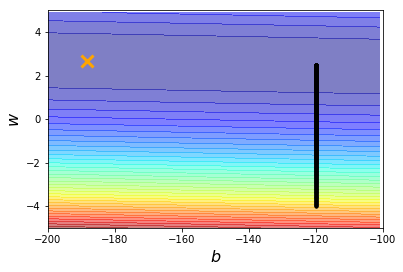

2.472956712632172 -120.05765898642849


In [16]:
# ydata = b + w * xdata 
b = -120. # initial b	
w = -4. # initial w
lr = 1. # learning rate
iteration = 100000

b_lr = 0.0
w_lr = 0.0

# Store initial values for plotting.
b_history = [b]
w_history = [w]

# Iterations
for i in range(iteration):
    
    b_grad = 0.0
    w_grad = 0.0
    for n in range(len(x_data)):        
        b_grad = b_grad  - 2.0*(y_data[n] - b - w*x_data[n])*1.0
        w_grad = w_grad  - 2.0*(y_data[n] - b - w*x_data[n])*x_data[n]
    
    b_lr = b_lr + b_grad**2
    w_lr = w_lr + w_grad**2
    Lr=0.000000002
    # Update parameters.
    b = b-Lr*b_grad #b - lr/np.sqrt(b_lr) * b_grad 
    w =w-Lr*w_grad #w - lr/np.sqrt(w_lr) * w_grad
    
    # Store parameters for plotting
    b_history.append(b)
    w_history.append(w)

# plot the figure
plt.contourf(x,y,Z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))
plt.plot([-188.4], [2.67], 'x', ms=12, markeredgewidth=3, color='orange')
plt.plot(b_history, w_history, 'o-', ms=3, lw=1.5, color='black')
plt.xlim(-200,-100)
plt.ylim(-5,5)
plt.xlabel(r'$b$', fontsize=16)
plt.ylabel(r'$w$', fontsize=16)
plt.show()
print(w,b)

In [7]:
import pandas as pd
import numpy as np
frame=pd.read_csv("D:\data\ML\pokemon.csv",header=0,sep=",")
frame.head()
class grandient:
    def __init__(self,x,y):
        self.x=x
        self.y=y
        self.bass=np.sum(self.y**2)
    def lossfunc(self,w,b):
        return np.sum((self.y-(w*self.x+b))**2)
    def lossfunc2(self,w2,w1,b):
        return np.sum((self.y-(w2*(self.x**2)+w1*self.x+b))**2)

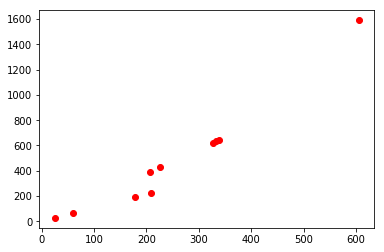

In [8]:
import matplotlib.pyplot as plt
plt.plot(x_data,y_data,"ro")# 繪製 hp cp 關係

2.122262787510723 1.97337784799457 202969.84057442183


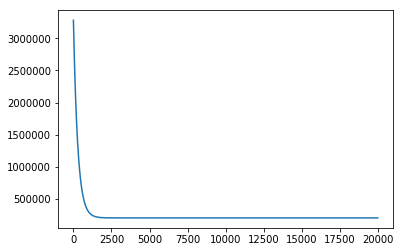

In [9]:
cp=np.array(x_data)#np.array(frame["cp"])
hp=np.array(y_data)#np.array(frame["hp"])
w=4
b=2
g=grandient(cp,hp)
error=[]
sep=0.0000001
change_rate=0.000000001
for i in range(20000):
    losswp=g.lossfunc(w-sep,b)
    losswn=g.lossfunc(w+sep,b)
    lossbp=g.lossfunc(w,b-sep)
    lossbn=g.lossfunc(w,b+sep)
    error.append(losswp)
    w=w-(losswn-losswp)/sep/2*change_rate
   # print((losswn-losswp)/sep/2*change_rate)
    b=b-(lossbn-lossbp)/sep/2*change_rate
plt.plot(error)
print(w,b,error[-1])   

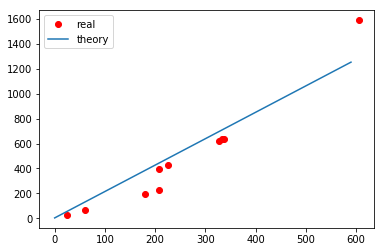

In [10]:
plt.plot()# 繪製 hp cp 關係
l1 = plt.plot(cp,hp,"ro")
x=np.array(range(0,600,10))
l2 = plt.plot(x,x*w+b)
plt.legend(['real','theory'])
plt.show()

0.0025973740387069525 1.000005245955902 2.0000000117152745 25263.830936162416


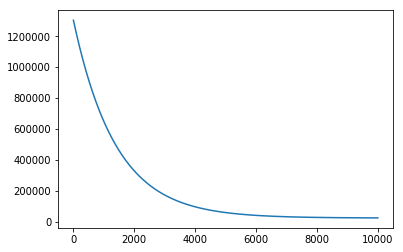

In [11]:
cp=np.array(x_data)#np.array(frame["cp"])
hp=np.array(y_data)#np.array(frame["hp"])
w1=1
w2=0
b=2
g=grandient(cp,hp)
error=[]
sep=0.00000000001
change_rate=0.000000000000001
for i in range(10000):
    lossw1p=g.lossfunc2(w2,w1-sep,b)
    lossw1n=g.lossfunc2(w2,w1+sep,b)
    lossbp=g.lossfunc2(w2,w1,b-sep)
    lossbn=g.lossfunc2(w2,w1,b+sep)
    lossw2p=g.lossfunc2(w2-sep,w1,b)
    lossw2n=g.lossfunc2(w2+sep,w1,b)
    error.append(lossw1p)
    w1=w1-(lossw1n-lossw1p)/sep/2*change_rate
   # print((losswn-losswp)/sep/2*change_rate)
    w2=w2-(lossw2n-lossw2p)/sep/2*change_rate
    b=b-(lossbn-lossbp)/sep/2*change_rate
plt.plot(error)
print(w2,w1,b,error[-1])   

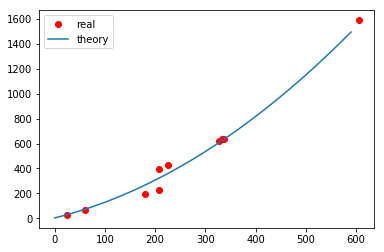

In [12]:
plt.plot()# 繪製 hp cp 關係
l1 = plt.plot(cp,hp,"ro")
x=np.array(range(0,600,10))
l2 = plt.plot(x,w2*(x**2)+w1*x+b)
plt.legend(['real','theory'])
plt.show()

In [54]:
wc=2*3.1415*400

c1=4*10**-9
c2=0.25*10**-9
r=4.227
r0=1/16
r=14.213
r3=r/wc/c1
r1=1/(r0*r*wc*c1)
r2=r1
print("c1 "+str(c1)+" c2 "+str(c2)+" r1 "+str(r1)+" r2 "+str(r2)+" r3 "+str(r3))

c1 4e-09 c2 2.5e-10 r1 111981.73300220034 r2 111981.73300220034 r3 1413834.9514563105


In [55]:



print((2/r2+1/r3)/c1,1/(r2*r3*c1*c2))
print(1.845*wc,wc**2)


4641.837984334764 6316174.24
4636.854 6316174.240000001
